In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
walmart_sales = pd.read_csv("Walmart.csv")
walmart_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
walmart_sales.sort_values(by="Date", ascending=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5208,37,01-04-2011,534578.78,0,67.31,3.524,213.577670,8.300
1204,9,01-04-2011,520962.14,0,56.12,3.524,218.445164,6.380
1776,13,01-04-2011,1864238.64,0,42.49,3.487,128.719935,7.193
2634,19,01-04-2011,1305950.22,0,30.68,3.811,134.068258,7.658
6066,43,01-04-2011,611585.54,0,67.79,3.524,206.673311,10.581
...,...,...,...,...,...,...,...,...
1620,12,31-12-2010,891736.91,1,45.64,3.148,127.087677,14.313
5767,41,31-12-2010,1001790.16,1,25.19,2.829,191.255700,7.508
5624,40,31-12-2010,811318.30,1,19.29,3.177,132.815032,5.287
2907,21,31-12-2010,672903.23,1,47.19,2.943,211.064774,8.163


In [5]:
print(walmart_sales.isnull().any())

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool


In [6]:
walmart_sales.shape

(6435, 8)

In [7]:
walmart_sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
walmart_sales["Date"] = pd.to_datetime(walmart_sales["Date"]).dt.strftime('%Y-%m-%d')

In [9]:
walmart_sales["Year"] = pd.to_datetime(walmart_sales["Date"]).dt.strftime('%Y')

In [11]:
walmart_sales["Month"] = pd.to_datetime(walmart_sales["Date"]).dt.strftime('%m')

In [12]:
walmart_sales["Year-Month"] = pd.to_datetime(walmart_sales["Date"]).dt.strftime('%Y-%m')

In [13]:
walmart_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Year-Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,05,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,05,2010-05


In [14]:
walmart_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Year-Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,05,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,05,2010-05


In [64]:
walmart_sales['Store'] = walmart_sales['Store'].astype(object)

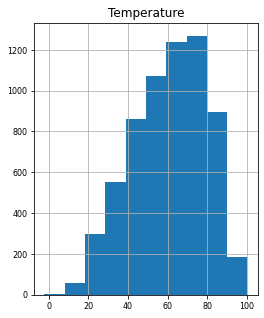

In [16]:
walmart_sales[["Temperature"]].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

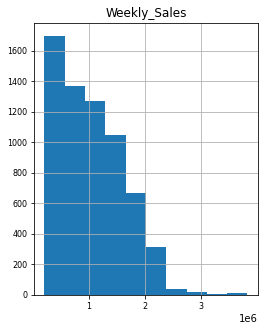

In [17]:
walmart_sales[["Weekly_Sales"]].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

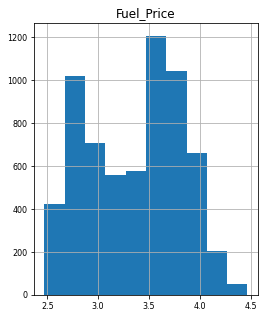

In [18]:
walmart_sales[["Fuel_Price"]].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

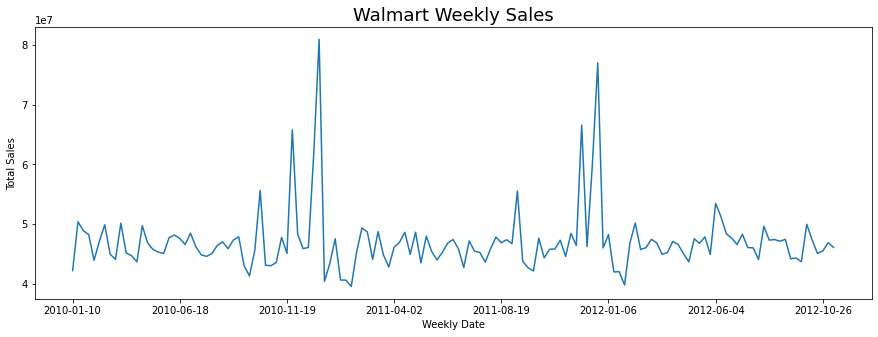

In [61]:
plt.figure(figsize=(15, 5))
walmart_sales.groupby(['Date'])['Weekly_Sales'].sum().plot()
plt.title('Walmart Weekly Sales', fontsize=18)
plt.xlabel('Weekly Date')
plt.ylabel('Total Sales')
plt.show()

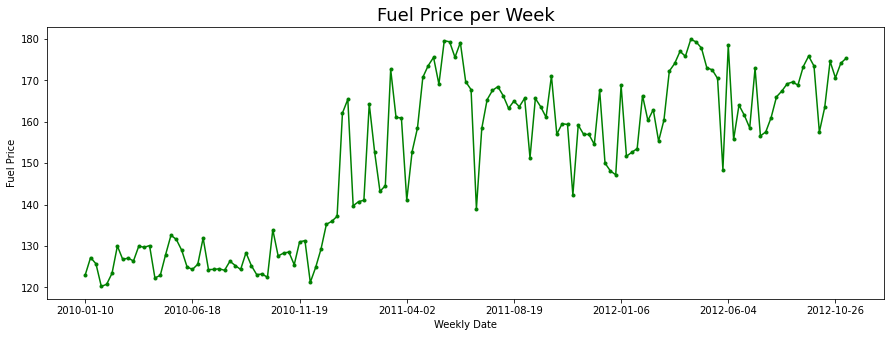

In [60]:
plt.figure(figsize=(15, 5))
walmart_sales.groupby(['Date'])['Fuel_Price'].sum().plot(color='green',marker='.')
plt.title('Fuel Price per Week', fontsize=18)
plt.xlabel('Weekly Date')
plt.ylabel('Fuel Price')
plt.show()

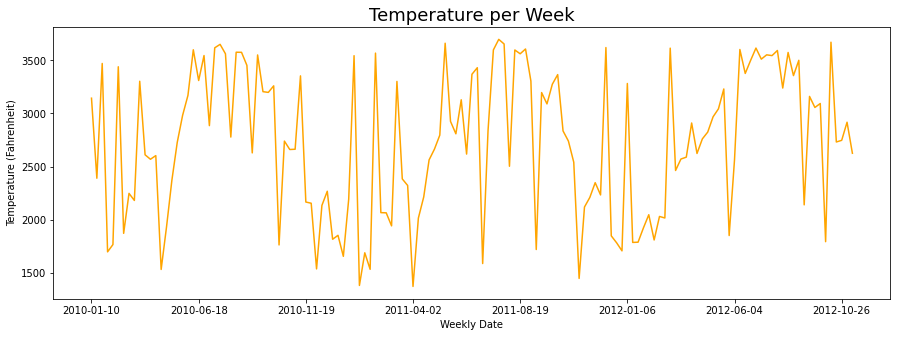

In [62]:
plt.figure(figsize=(15, 5))
walmart_sales.groupby(['Date'])['Temperature'].sum().plot(color="orange")
plt.title('Temperature per Week', fontsize=18)
plt.xlabel('Weekly Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.show()

In [22]:
walmart_sales.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


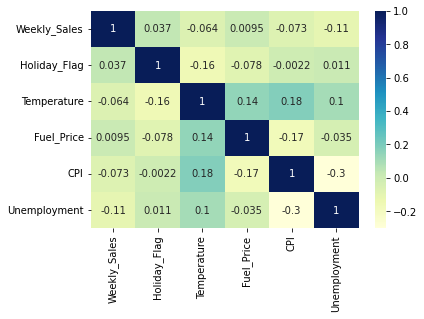

In [23]:
dataplot = sb.heatmap(walmart_sales.corr(), cmap="YlGnBu", annot=True)

<Figure size 432x288 with 0 Axes>

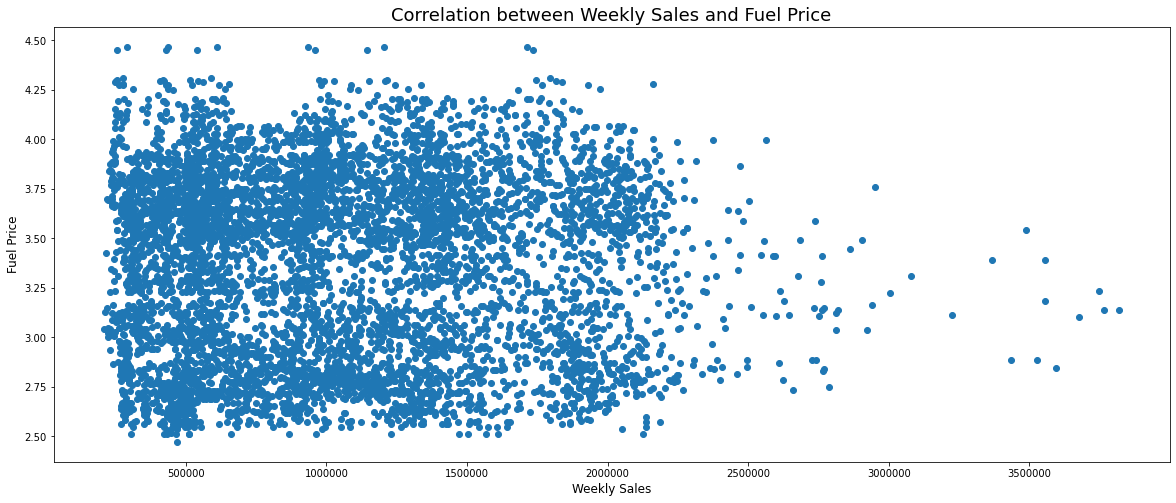

In [58]:
plt.clf()
plt.figure(figsize=(20, 8))
# Scatterplot pertama
plt.ticklabel_format(style='plain')
plt.scatter(walmart_sales['Weekly_Sales'], walmart_sales['Fuel_Price'])
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Fuel Price', fontsize=12)
plt.title('Correlation between Weekly Sales and Fuel Price', fontsize=18)
plt.show()

<Figure size 432x288 with 0 Axes>

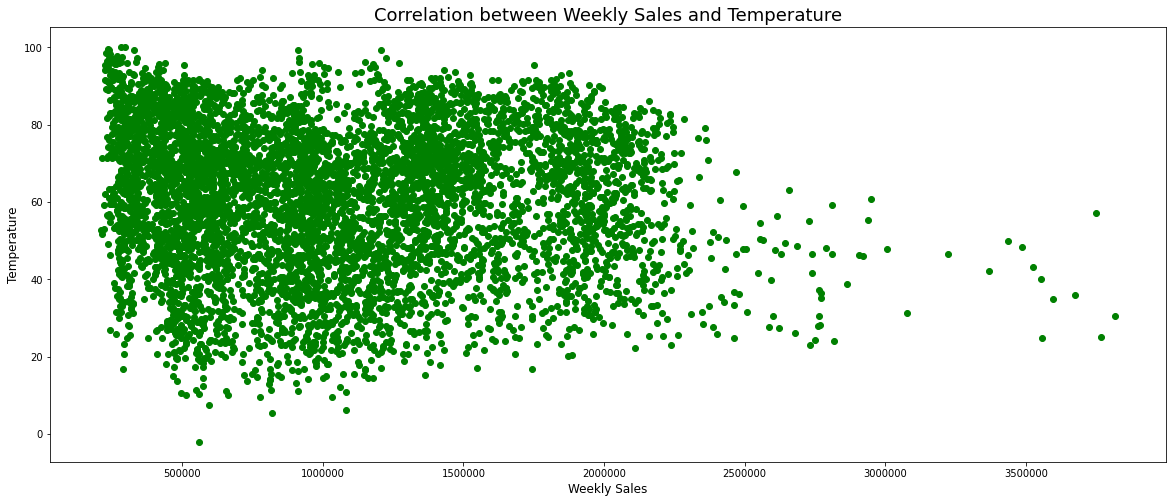

In [57]:
#Correlation between Weekly Sales and Temperature

plt.clf()
plt.figure(figsize=(20, 8))
# Scatterplot pertama
plt.ticklabel_format(style='plain')
plt.scatter(walmart_sales['Weekly_Sales'], walmart_sales['Temperature'], color='green')
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.title('Correlation between Weekly Sales and Temperature', fontsize=18)
plt.show()

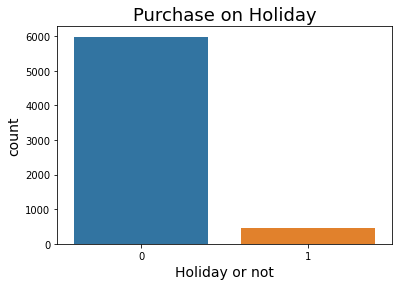

In [55]:
sns.countplot(x ='Holiday_Flag', data = walmart_sales)
plt.title('Purchase on Holiday', fontsize=18)
plt.xlabel('Holiday or not', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

#Holiday_Flag - whether the week is a special holiday week 
# 1 – Holiday week 
# 0 – Non-holiday week

In [29]:
walmart_sales['Store'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=object)

In [30]:
# which store has the most sales of all time?
store_rank = walmart_sales["Weekly_Sales"].groupby(walmart_sales["Store"]).sum()/100000000
store_rank.sort_values(ascending=0).head(5)

Store
20    3.013978
4     2.995440
14    2.889999
13    2.865177
2     2.753824
Name: Weekly_Sales, dtype: float64

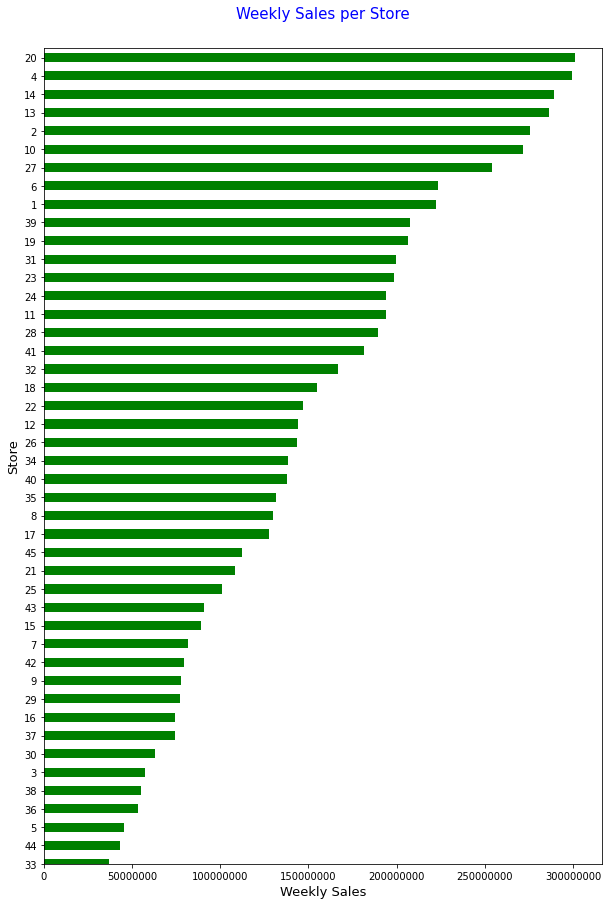

In [63]:
# proof by figure

plt.figure(figsize=(10, 15))
plt.clf()
plt.ticklabel_format(style='plain')
walmart_sales.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Weekly Sales per Store',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Weekly Sales', fontsize = 13)
plt.ylabel('Store',fontsize = 13)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

In [32]:
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   object 
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Year          6435 non-null   object 
 9   Month         6435 non-null   object 
 10  Year-Month    6435 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 553.1+ KB


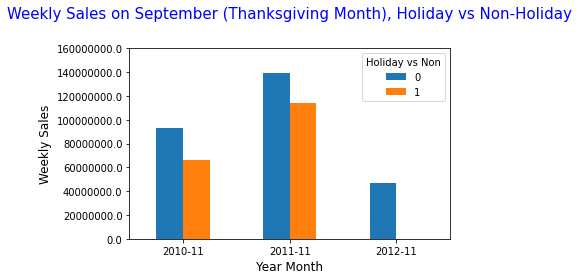

In [34]:
# Sales Performance on Thanksgiving

Thanksgiving = walmart_sales[walmart_sales['Month']=='11']
Thanksgiving = Thanksgiving.sort_values('Year-Month', ascending = True)

Thanksgiving.groupby(['Year-Month','Holiday_Flag'])['Weekly_Sales'].sum().unstack().plot(kind='bar')
plt.title('Weekly Sales on September (Thanksgiving Month), Holiday vs Non-Holiday',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Year Month', fontsize=12)
plt.ylabel('Weekly Sales',fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=False, title='Holiday vs Non')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, labels)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
Thanksgiving_group = Thanksgiving.groupby('Year-Month')['Weekly_Sales'].sum()
Thanksgiving_group.apply(lambda x: '%.0f' % x)

Year-Month
2010-11    158773134
2011-11    253470323
2012-11     46925879
Name: Weekly_Sales, dtype: object

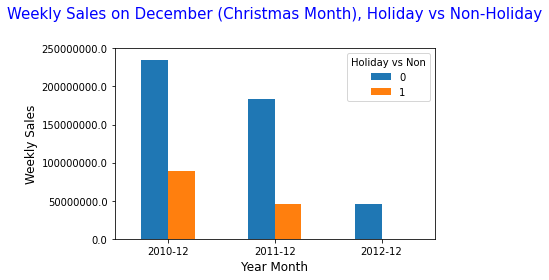

In [36]:
# Sales Performance on Christmas 
Christmas = walmart_sales[walmart_sales['Month']=='12']
Christmas = Christmas.sort_values('Year-Month', ascending = True)

Christmas.groupby(['Year-Month','Holiday_Flag'])['Weekly_Sales'].sum().unstack().plot(kind='bar')
plt.title('Weekly Sales on December (Christmas Month), Holiday vs Non-Holiday',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Year Month', fontsize=12)
plt.ylabel('Weekly Sales',fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=False, title='Holiday vs Non')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, labels)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
Christmas_group = Christmas.groupby('Year-Month')['Weekly_Sales'].sum()
Christmas_group.apply(lambda x: '%.0f' % x)

Year-Month
2010-12    323571609
2011-12    229375968
2012-12     46128514
Name: Weekly_Sales, dtype: object

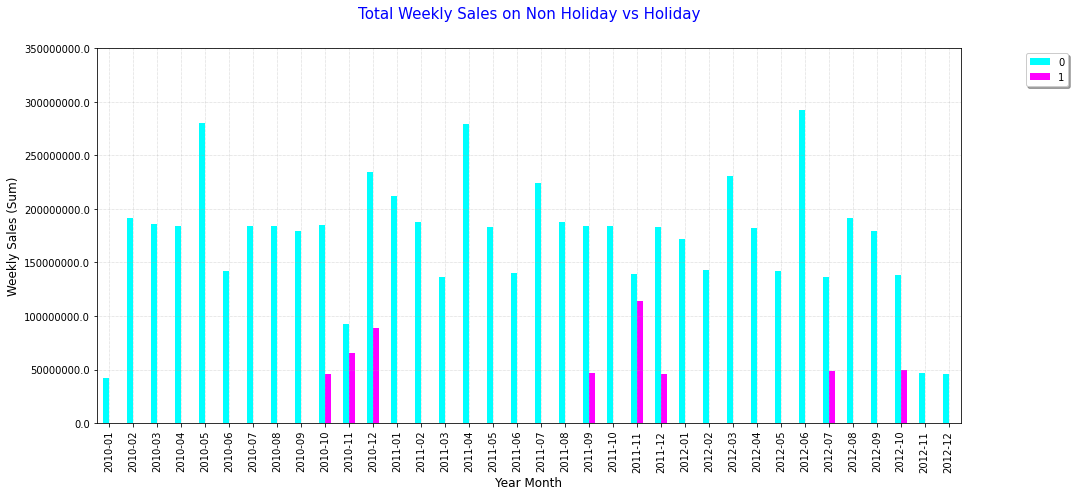

In [46]:
walmart_sales.groupby(['Year-Month','Holiday_Flag'])['Weekly_Sales'].sum().unstack().plot(kind="bar", cmap='cool')
plt.title('Total Weekly Sales on Non Holiday vs Holiday',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Year Month', fontsize = 12)
plt.ylabel('Weekly Sales (Sum)',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, labels)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


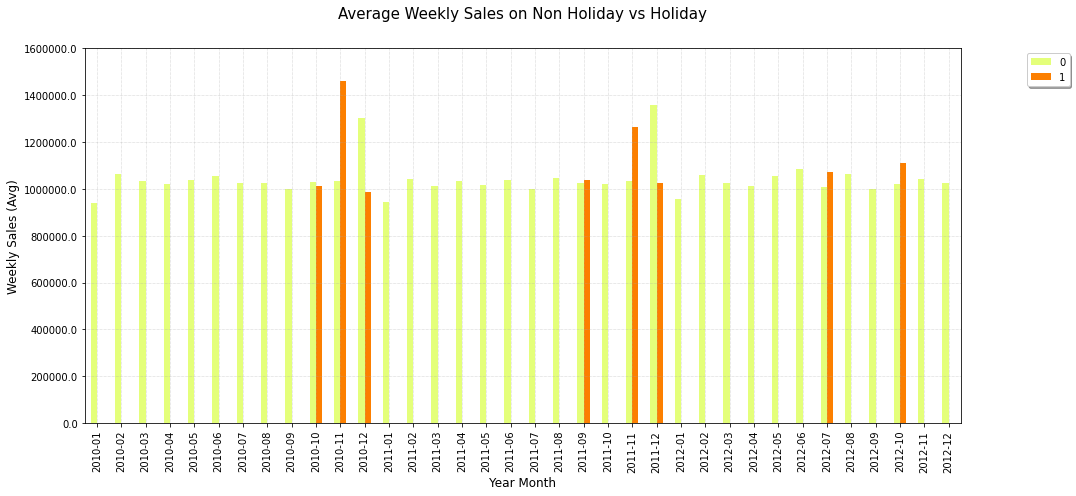

In [120]:
walmart_sales.groupby(['Year-Month','Holiday_Flag'])['Weekly_Sales'].mean().unstack().plot(kind="bar", cmap='Wistia')
plt.title('Average Weekly Sales on Non Holiday vs Holiday',loc='center',pad=30, fontsize=15, color='Black')
plt.xlabel('Year Month', fontsize = 12)
plt.ylabel('Weekly Sales (Avg)',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, labels)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


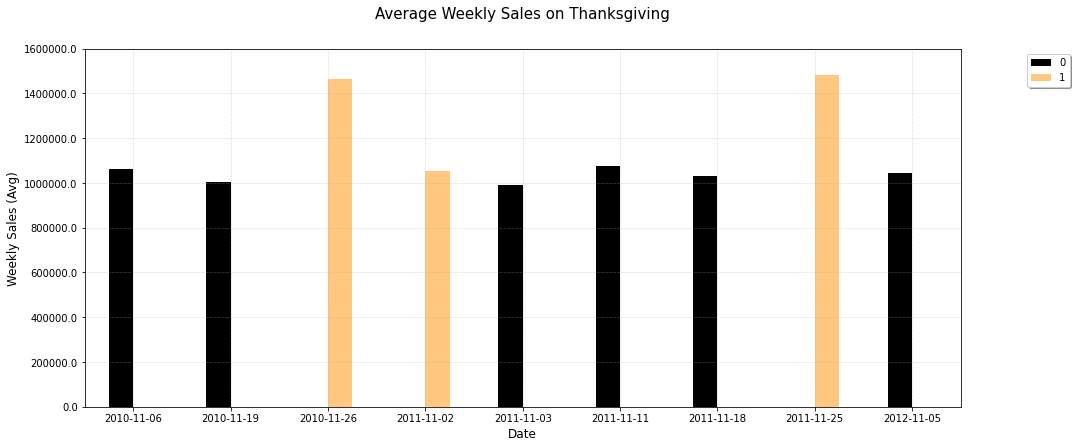

In [52]:
Thanksgiving = walmart_sales[walmart_sales['Month']=='11']
Thanksgiving = Thanksgiving.sort_values('Date')

Thanksgiving.groupby(['Date','Holiday_Flag'])['Weekly_Sales'].mean().unstack().plot(kind="bar", cmap='copper')
plt.title('Average Weekly Sales on Thanksgiving',loc='center',pad=30, fontsize=15, color='Black')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Weekly Sales (Avg)',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, labels)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

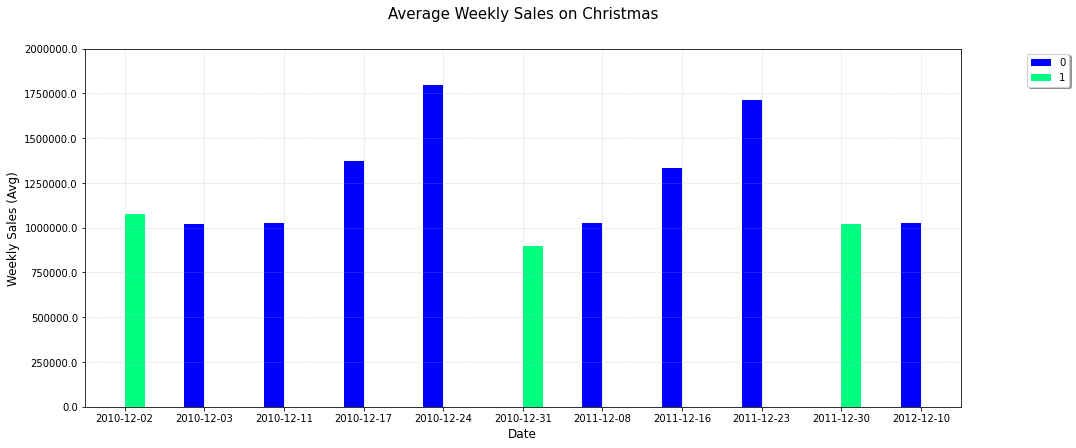

In [53]:
Christmas = walmart_sales[walmart_sales['Month']=='12']
Christmas = Christmas.sort_values('Date')

Christmas.groupby(['Date','Holiday_Flag'])['Weekly_Sales'].mean().unstack().plot(kind="bar", cmap='winter')
plt.title('Average Weekly Sales on Christmas',loc='center',pad=30, fontsize=15, color='Black')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Weekly Sales (Avg)',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, labels)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()